# Keras Regression

Kaggle [link](https://www.kaggle.com/harlfoxem/housesalesprediction)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### EDA

In [5]:
df.isnull().sum() #Count of missing data points

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


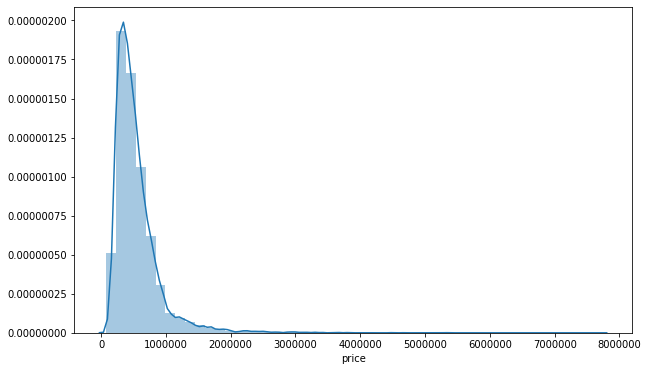

In [7]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

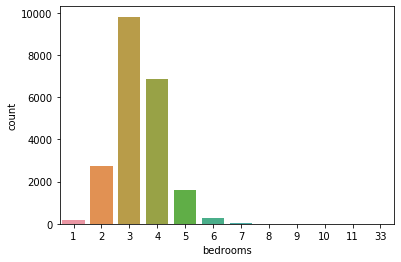

In [8]:
sns.countplot(df['bedrooms'])

In [10]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

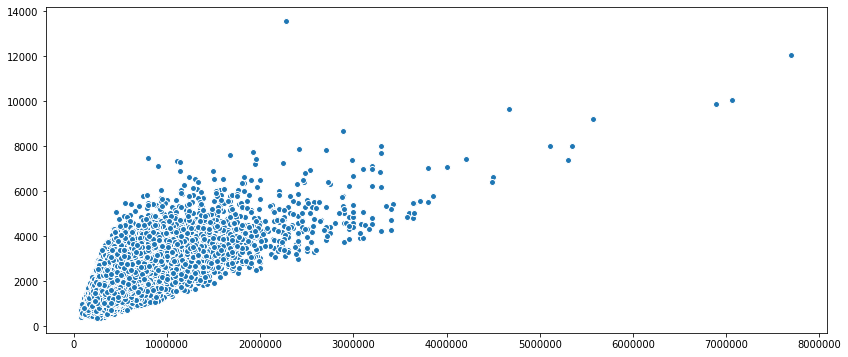

In [22]:
plt.figure(figsize=(14,6))
plt.scatter(x='price', y='sqft_living', data=df, edgecolors='white')

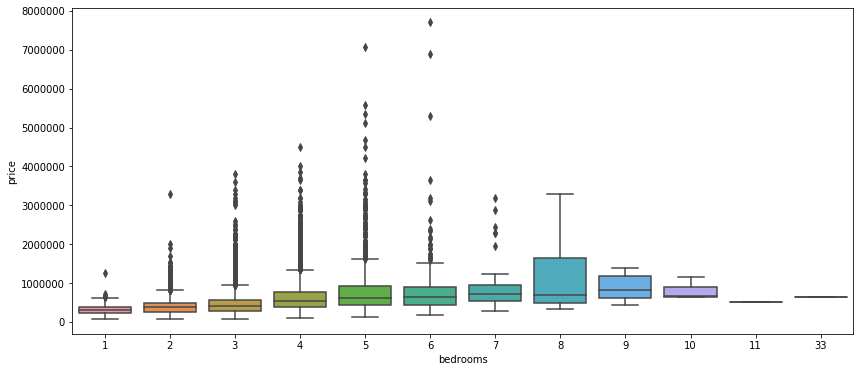

In [26]:
plt.figure(figsize=(14,6))
sns.boxplot(x='bedrooms', y='price', data=df)

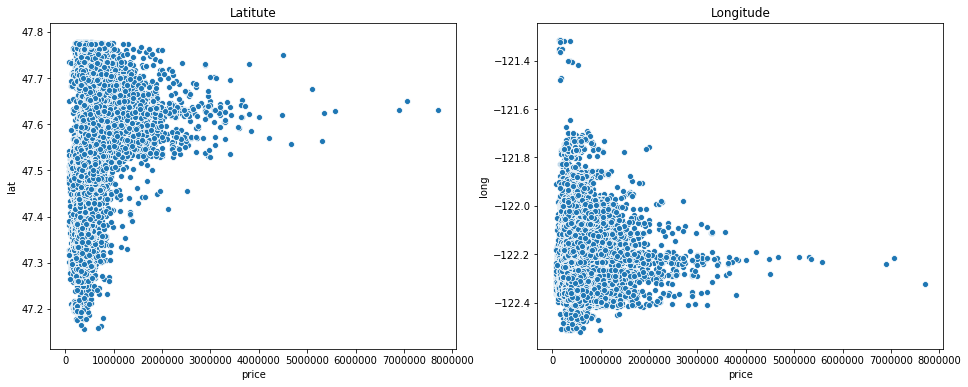

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Latitute')
sns.scatterplot(x='price', y='lat', data=df, ax=ax1)

ax2.set_title('Longitude')
sns.scatterplot(x='price', y='long', data=df, ax=ax2)

**King County Map (Reference purpose)**
<img src="Data/kc_map.jpg" width=450 height=450/>

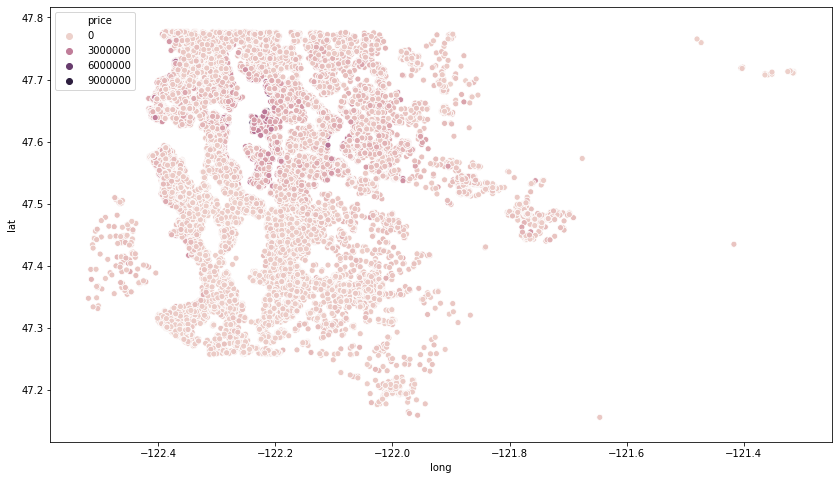

In [39]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [40]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


**From this and the above distplot ( *refer Out [ 7 ]* ), we can see that there are approx 15-20 houses that costs more than 3M.** 

**So we'll sample out top 1 percent of those ( *for our visulization to get a clear color dist on our scatter plot* )**  

In [42]:
print("Total length of our DF: ", len(df))
print("1% of this: ", len(df)*0.01)

Total length of our DF:  21597
1% of this:  215.97


In [44]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

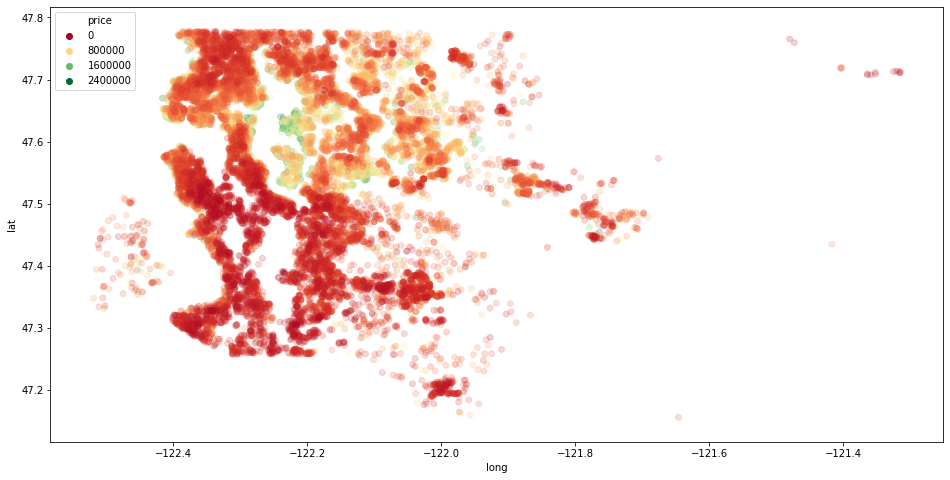

In [48]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')

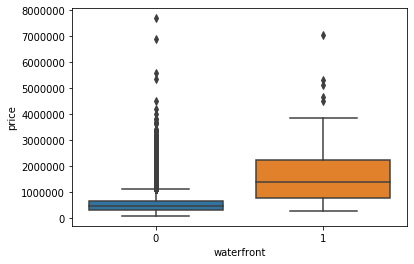

In [50]:
sns.boxplot(x='waterfront', y='price', data=df)

### Working with Feature Data

In [51]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
df = df.drop('id', axis=1)

### Feature Engineering from Date

In [56]:
df['date'] = pd.to_datetime(df['date']) #Converting string to Datetime 

In [57]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [58]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


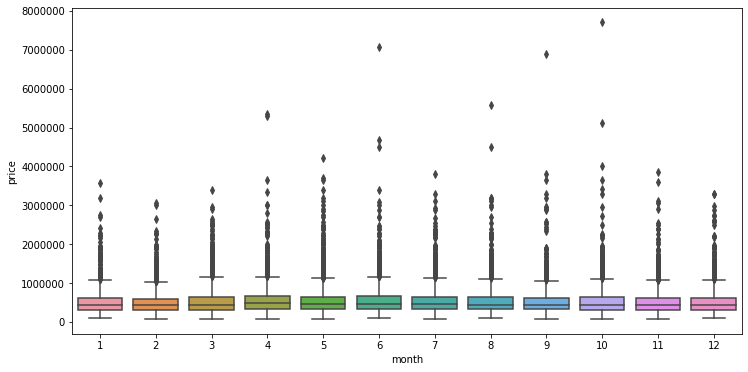

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='price', data=df)

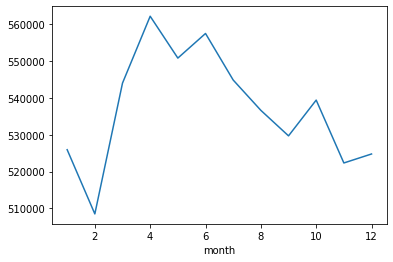

In [65]:
df.groupby('month').mean()['price'].plot()

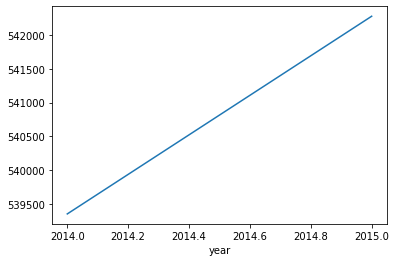

In [66]:
df.groupby('year').mean()['price'].plot()

In [70]:
df = df.drop('date', axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [72]:
#df['zipcode'].value_counts()

In [73]:
df = df.drop('zipcode', axis=1)

In [74]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [75]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Train Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = df.drop('price', axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
X_train = scaler.fit_transform(X_train)

In [81]:
X_test = scaler.transform(X_test)

### Building a Model

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [84]:
X_train.shape

(15117, 19)

In [85]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [86]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 124us/sample - loss: 430237778137.8464 - val_loss: 418907520295.8222
Epoch 2/400
15117/15117 [==============================] - 0s 32us/sample - loss: 429241351316.2792 - val_loss: 415518130985.0864
Epoch 3/400
15117/15117 [==============================] - 0s 30us/sample - loss: 415877936961.9263 - val_loss: 385113118199.1506
Epoch 4/400
15117/15117 [==============================] - 0s 29us/sample - loss: 350485393019.9950 - val_loss: 278262593197.1951
Epoch 5/400
15117/15117 [==============================] - 0s 30us/sample - loss: 211033047622.0075 - val_loss: 134015111319.7037
Epoch 6/400
15117/15117 [==============================] - 0s 29us/sample - loss: 110971111086.7987 - val_loss: 95375827692.4049
Epoch 7/400
15117/15117 [==============================] - 0s 30us/sample - loss: 97715963660.5485 - val_loss: 93754378032.6716
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 0s 29us/sample - loss: 40606781336.4959 - val_loss: 39419349785.9160
Epoch 65/400
15117/15117 [==============================] - 0s 27us/sample - loss: 40372725977.7109 - val_loss: 39196902195.2000
Epoch 66/400
15117/15117 [==============================] - 0s 28us/sample - loss: 40223366907.0720 - val_loss: 38983702745.4420
Epoch 67/400
15117/15117 [==============================] - 0s 28us/sample - loss: 40002250563.0101 - val_loss: 38761019493.1358
Epoch 68/400
15117/15117 [==============================] - 0s 28us/sample - loss: 39817949969.7644 - val_loss: 38580419111.1901
Epoch 69/400
15117/15117 [==============================] - 0s 28us/sample - loss: 39617763375.2813 - val_loss: 38447911786.8247
Epoch 70/400
15117/15117 [==============================] - 0s 29us/sample - loss: 39484167851.2763 - val_loss: 38246719998.7358
Epoch 71/400
15117/15117 [==============================] - 0s 28us/sample - loss: 39333507243.6489 - val_loss

15117/15117 [==============================] - 0s 29us/sample - loss: 34124011176.5668 - val_loss: 32834504183.1506
Epoch 128/400
15117/15117 [==============================] - 0s 28us/sample - loss: 34080558792.7425 - val_loss: 32786479179.8519
Epoch 129/400
15117/15117 [==============================] - 0s 29us/sample - loss: 34019383759.6010 - val_loss: 32716652311.3877
Epoch 130/400
15117/15117 [==============================] - 0s 28us/sample - loss: 33971371628.7200 - val_loss: 32693282507.5358
Epoch 131/400
15117/15117 [==============================] - 0s 28us/sample - loss: 33928542668.7560 - val_loss: 32635851035.1802
Epoch 132/400
15117/15117 [==============================] - 0s 29us/sample - loss: 33856252774.9792 - val_loss: 32583241793.7383
Epoch 133/400
15117/15117 [==============================] - 0s 29us/sample - loss: 33835090140.2850 - val_loss: 32509083238.4000
Epoch 134/400
15117/15117 [==============================] - 0s 28us/sample - loss: 33807725993.7353 - v

15117/15117 [==============================] - 0s 30us/sample - loss: 32075296213.7990 - val_loss: 30467102851.4765
Epoch 191/400
15117/15117 [==============================] - 0s 30us/sample - loss: 32049830635.6954 - val_loss: 30446731001.0469
Epoch 192/400
15117/15117 [==============================] - 0s 28us/sample - loss: 32068454959.3829 - val_loss: 30439961769.4025
Epoch 193/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31992227393.4352 - val_loss: 30423964856.5728
Epoch 194/400
15117/15117 [==============================] - 0s 28us/sample - loss: 32021787301.6540 - val_loss: 30363417147.4173
Epoch 195/400
15117/15117 [==============================] - 0s 28us/sample - loss: 31981473437.1867 - val_loss: 30360807889.2247
Epoch 196/400
15117/15117 [==============================] - 0s 28us/sample - loss: 31980009637.0105 - val_loss: 30348250291.5160
Epoch 197/400
15117/15117 [==============================] - 0s 31us/sample - loss: 31953958469.6011 - v

15117/15117 [==============================] - 0s 29us/sample - loss: 31158207874.7857 - val_loss: 29342092700.1284
Epoch 254/400
15117/15117 [==============================] - 0s 28us/sample - loss: 31121668624.3588 - val_loss: 29377568596.0691
Epoch 255/400
15117/15117 [==============================] - 0s 30us/sample - loss: 31111773221.3238 - val_loss: 29339049751.3877
Epoch 256/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31082710575.1797 - val_loss: 29369073896.6123
Epoch 257/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31082331553.4712 - val_loss: 29312258968.3358
Epoch 258/400
15117/15117 [==============================] - 0s 31us/sample - loss: 31078115690.3999 - val_loss: 29334900781.5111
Epoch 259/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31093959989.7673 - val_loss: 29258435455.0519
Epoch 260/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31072089513.0579 - v

15117/15117 [==============================] - 0s 29us/sample - loss: 30519619661.8991 - val_loss: 28608835654.7951
Epoch 317/400
15117/15117 [==============================] - 0s 28us/sample - loss: 30510686731.9558 - val_loss: 28579493437.9457
Epoch 318/400
15117/15117 [==============================] - 0s 28us/sample - loss: 30532676897.6151 - val_loss: 28585901589.4914
Epoch 319/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30519829807.1289 - val_loss: 28562438189.5111
Epoch 320/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30476497969.6522 - val_loss: 28563326707.9901
Epoch 321/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30528108038.1303 - val_loss: 28534685817.3630
Epoch 322/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30484593291.7780 - val_loss: 28498094014.2617
Epoch 323/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30500752916.0844 - v

15117/15117 [==============================] - 0s 29us/sample - loss: 30051663682.6037 - val_loss: 28019683681.9753
Epoch 380/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30062846552.0259 - val_loss: 27936133241.3630
Epoch 381/400
15117/15117 [==============================] - 0s 28us/sample - loss: 30082190163.5383 - val_loss: 27989545410.0543
Epoch 382/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30007134901.4032 - val_loss: 27923981633.1062
Epoch 383/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30002840429.7530 - val_loss: 28024788820.0691
Epoch 384/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30019890042.3523 - val_loss: 27946972076.5630
Epoch 385/400
15117/15117 [==============================] - 0s 30us/sample - loss: 29983773488.5176 - val_loss: 27945163070.5778
Epoch 386/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30031281488.3207 - v

In [87]:
 losses = pd.DataFrame(model.history.history)

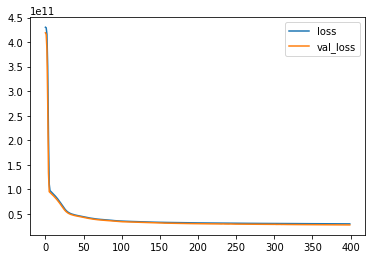

In [88]:
losses.plot()

### Evaluation

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [90]:
pred = model.predict(X_test)

In [92]:
np.sqrt(mean_squared_error(y_test, pred))

166627.9821702459

In [93]:
mean_absolute_error(y_test, pred)

102365.98519121335

In [94]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [95]:
5.402966e+05

540296.6

**From the mean of the price and the mean_absolute_error, we can see our predictions are off by approx 20% which isn't good.**

**We'll use varience score to try to get a deeper understanding of out evaluation matrix here**

In [96]:
explained_variance_score(y_test, pred)

0.7907659748434575

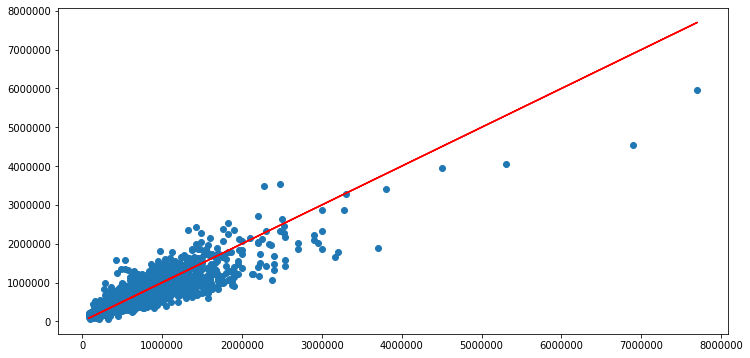

In [98]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, 'r')

**What can be done here is, we can train the model excluding the top 1% houses i.e. say we can work on imporving the model's accuracy for house below 3M depending on the context or the problem you're trying to solve.**

---

### Predicting House Price using User Input data

In [100]:
single_house = df.drop('price', axis=1).iloc[0]

In [104]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [105]:
model.predict(single_house) #predicted price

array([[285883.78]], dtype=float32)

In [107]:
df['price'][0] #actual price

221900.0

**Like mentioned before, we can retrain the model by excluding the top 1% house and retraining the model and improving it's accuracy for bottom 99% or say houses below 3M.**